In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection

/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


In [ ]:
!yolo detect predict model=yolov8l-seg.pt source="https://cdn1.epicgames.com/ue/product/Screenshot/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg" show_labels=True show_boxes=False

100% 88.1M/88.1M [00:00<00:00, 214MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

100% 1.46M/1.46M [00:00<00:00, 105MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg: 384x640 3 cars, 1 fire hydrant, 1 suitcase, 1 potted plant, 82.2ms
Speed: 13.4ms preprocess, 82.2ms inference, 801.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


img shape: (1080, 1920, 3)
img shape changed: (360, 640, 3)


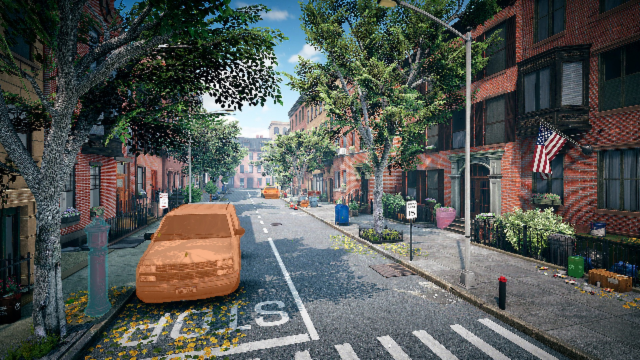

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/runs/segment/predict/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg"
img=cv2.imread(path)
print("img shape:",img.shape)
img=imutils.resize(img,width=640)
print("img shape changed:",img.shape)

cv2_imshow(img)

In [ ]:
####
#Library
#Image & Model
#Predicttion & Score
#Show results
####

100%|██████████| 83.7M/83.7M [00:01<00:00, 69.0MB/s]



0: 384x640 3 traffic lights, 77.5ms
Speed: 2.0ms preprocess, 77.5ms inference, 622.5ms postprocess per image at shape (1, 3, 384, 640)


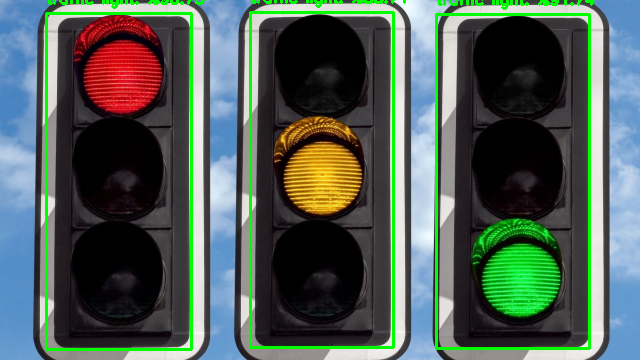

In [ ]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/test.jpg"
model_path = "yolov8l.pt"

img = cv2.imread(img_path)
img=imutils.resize(img,width=640)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 2)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 2)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

In [ ]:
!unzip /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/traffic_sign_dataset.zip -d ./data

Archive:  /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/traffic_sign_dataset.zip
 extracting: ./data/README.dataset.txt  
 extracting: ./data/README.roboflow.txt  
 extracting: ./data/data.yaml        
   creating: ./data/test/
   creating: ./data/test/images/
 extracting: ./data/test/images/3F523966-23D2-4F56-A0FB-E14C0D9253E3-9302-000007468771F4A5_jpg.rf.287ec60763bcaa7e12ca3e942dce4efc.jpg  
 extracting: ./data/test/images/Control_jpg.rf.3c9dceaa546aeef3ae54e1e11c0d8226.jpg  
 extracting: ./data/test/images/IMG_2433_jpg.rf.5f70e2d4add6e5132791516b411ee576.jpg  
 extracting: ./data/test/images/IMG_2498_jpg.rf.538c880be1eae9a7892166f1ed3c82dc.jpg  
 extracting: ./data/test/images/IMG_2613_jpg.rf.236445d58691946e007e802fe9eef241.jpg  
 extracting: ./data/test/images/IMG_2616-2_jpg.rf.68666dfc343606b2639ca40a97ad0630.jpg  
 extracting: ./data/test/images/IMG_2629_jpg.rf.feebbd6c731d26130e9d7fe4e2f9774b.jpg  
 extracting: ./data/test/images/IMG_2635_


train: ./train/images
val: ./valid/images
test: ./test/images


In [ ]:
!yolo detect train model=yolov8l.pt data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=40 name=yolov8_traffic_sign

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/data.yaml, epochs=40, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_traffic_sign, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

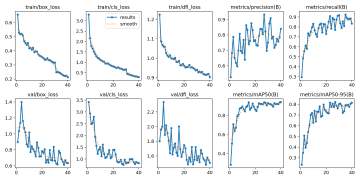

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/runs/detect/yolov8_traffic_sign/results.png"
img=cv2.imread(img_path)
img=imutils.resize(img,width=360)

cv2_imshow(img)

In [ ]:
!yolo detect predict model="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/runs/detect/yolov8_traffic_sign/weights/best.pt" source="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/test/images/IMG_2498_jpg.rf.538c880be1eae9a7892166f1ed3c82dc.jpg"

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43635135 parameters, 0 gradients, 165.0 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/test/images/IMG_2498_jpg.rf.538c880be1eae9a7892166f1ed3c82dc.jpg: 640x640 (no detections), 61.7ms
Speed: 3.9ms preprocess, 61.7ms inference, 23.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



0: 640x640 1 U-Turn, 63.1ms
Speed: 2.7ms preprocess, 63.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


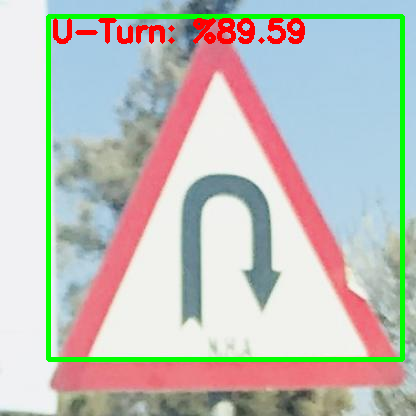

In [ ]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/data/test/images/IMG_3028_jpg.rf.2bd3a0d0d4cb744978a247a055f3113d.jpg"
model_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/runs/detect/yolov8_traffic_sign/weights/best.pt"

img = cv2.imread(img_path)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 4)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1+3, y1+25), font, 1, (0,0,255), 4)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

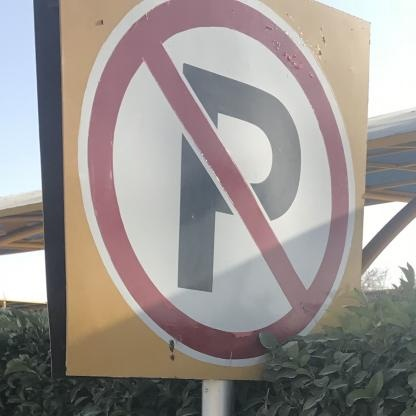

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficSignDetection/runs/detect/predict/IMG_2498_jpg.rf.538c880be1eae9a7892166f1ed3c82dc.jpg"
img=cv2.imread(img_path)


cv2_imshow(img)